In [1]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex
import copy 

In [2]:
print(isinstance(1,complex))
print(isinstance(1+0j,complex))

False
True


z=x+iy= (3+2j)


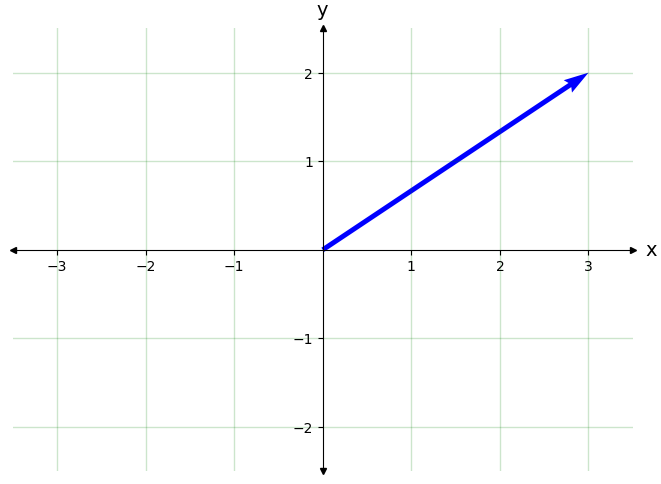

In [3]:
'''Forma cartesiana''' 
z = 3 + 2j

'''Extraemos las partes real e imaginaria'''
x=z.real
y=z.imag
print('z=x+iy=',x + 1j*y)

''' Representación en el plano complejo '''
tQ.plot_2D_plane(left=-int(abs(x)),right=int(abs(x)),up=int(abs(y)),down=-int(abs(y)))
tQ.draw_vector(x,y,'b')


(-1.8729133745815927-0.7015664553792397j)
z=r exp(i th)= (-1.873-0.702j)


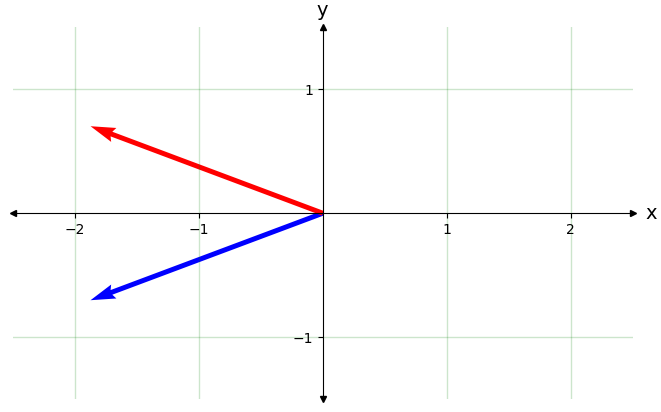

In [4]:
'''Forma polar'''
r=2
th=3.5
z = r*np.exp(th*1j)
print(z)
x=z.real
y=z.imag
print('z=r exp(i th)=',np.round(x,3) + np.round(y,3)*1j)


''' Dibujamos en el plano complejo '''
tQ.plot_2D_plane(left=-int(abs(x))-1,right=int(abs(x))+1,up=int(abs(y))+1,down=-int(abs(y))-1)
tQ.draw_vector(z.real,z.imag)
tQ.draw_vector(z.conjugate().real,z.conjugate().imag,vcolor='r')

In [5]:
'Conversión de Cartesianas a Polares'
def cartes2polar(z):

    r = np.abs(z)    
    y = z.imag
    x = z.real
    
    if r==0:
        print('el número 0+i0 no admite representación polar')
        th='indefinido'
    elif x==0 and y>0: 
        th=np.pi/2
    elif x==0 and y<0:
        th=3*np.pi/2
    elif x>0 and y>=0:
        th=np.arctan(y/x)
    elif x<0 and y>=0:
        th=np.arctan(-y/x)+np.pi/2
    elif x<0 and y<0:
        th=np.arctan(y/x)+np.pi
    elif x>0 and y<0:
         th=np.arctan(-y/x)+3*np.pi/2.       
            
    return r,th

#el signo correcto también se puede conseguir usando la funcion np.arctan2(x,y)

In [6]:
'A la inversa no es necesario definir ninguna funcion, ya que numpy directamente escribe un numero complejo en forma cartesiana'
z = 3*np.exp(1j*0.5)
print(np.round(z,2))


(2.63+1.44j)


z*=(x+iy)*= (2.6327476856711183-1.438276615812609j)


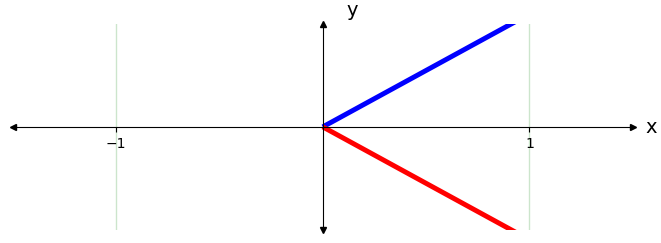

In [7]:
'''Conjugacion compleja'''
zc = z.conjugate()
print('z*=(x+iy)*=',z.real + 1j*zc.imag)

''' Representación en el plano complejo '''
tQ.plot_2D_plane(left=-int(abs(x)),right=int(abs(x)),up=int(abs(y)),down=-int(abs(y)))
tQ.draw_vector(z.real,z.imag,'b')
tQ.draw_vector(zc.real,zc.imag,vcolor='r')



z1+z2= (3+6j)
z1-z2= (-1+2j)
************************************


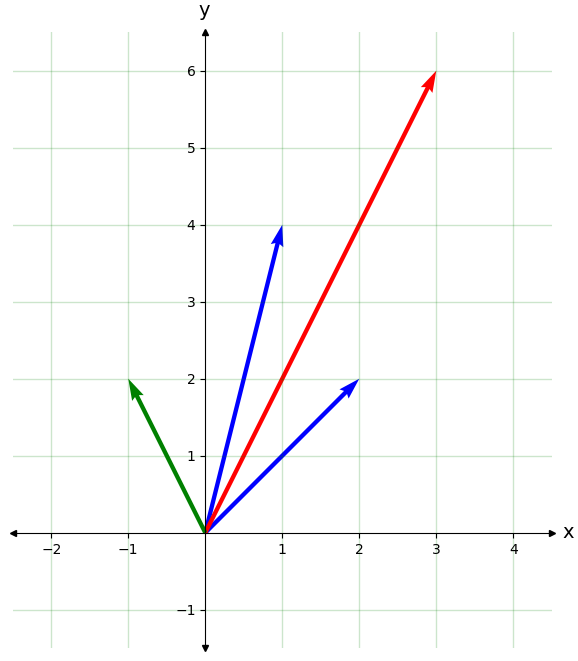

In [8]:
'''Suma en cartesianas'''

z1 = 1+4j
z2 = 2+2j

'''Suma y resta'''
zs = z1+z2
zd = z1-z2

print('z1+z2=',zs)
print('z1-z2=',zd)
print('************************************')


tQ.plot_2D_plane(left=-2,right=4,up=6,down=-1) #cambiar las dimensiones para que encuadrar la figura
tQ.draw_vector(z1.real,z1.imag,'b')
tQ.draw_vector(z2.real,z2.imag,'b')
tQ.draw_vector(zs.real,zs.imag,vcolor='r')
tQ.draw_vector(zd.real,zd.imag,vcolor='g')


z1+z2= (3.3976+0.7941j)
z1-z2= (1.8679+2.0825j)
************************************


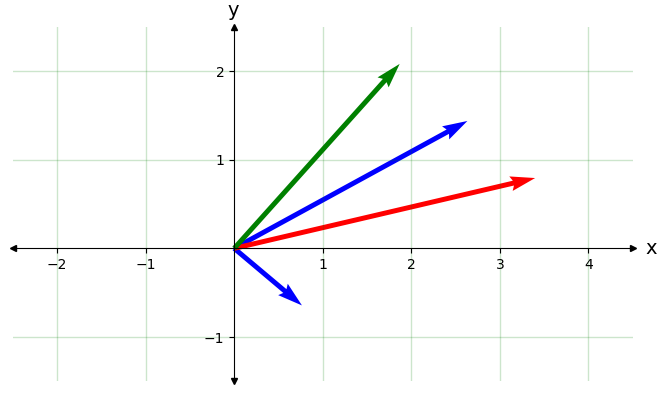

In [9]:
'python directamente escribe un numero complejo en forma cartesiana'
z1 = 3*np.exp(1j*0.5)
z2 = 1*np.exp(-1j*0.7)

'''Suma y resta'''
zs = z1+z2
zd = z1-z2

print('z1+z2=',np.round(zs,4))
print('z1-z2=',np.round(zd,4))
print('************************************')

tQ.plot_2D_plane(left=-2,right=4,up=2,down=-1) #cambiar las dimensiones para que encuadrar la figura
tQ.draw_vector(z1.real,z1.imag,'b')
tQ.draw_vector(z2.real,z2.imag,'b')
tQ.draw_vector(zs.real,zs.imag,vcolor='r')
tQ.draw_vector(zd.real,zd.imag,vcolor='g')


In [10]:
z1 = 3*np.exp(1j*0.5)
z2 = 1*np.exp(-1j*0.7)
'''Producto'''
print('z1*z2 = ', np.round(z1*z2,4))
print('z1**3 = ', np.round(pow(z1,6)))
print('************************************')

z1*z2 =  (2.9402-0.596j)
z1**3 =  (-722+103j)
************************************


In [11]:
'''Valor absoluto'''
print('|z1|=',abs(z1))
print('comprobación |z1|=',np.sqrt(z1*z1.conjugate()).real) 
print('************************************')


'''Division'''
print('z1/z2=',np.round(z1/z2,5))
print('comprobación z1/z2=', np.round(z1*z2.conjugate()/(z2*z2.conjugate()),5))

|z1|= 3.0
comprobación |z1|= 3.0
************************************
z1/z2= (1.08707+2.79612j)
comprobación z1/z2= (1.08707+2.79612j)


(-0+0j)


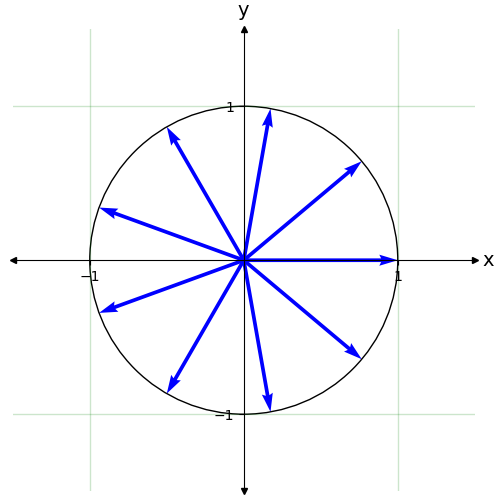

In [12]:

# cambiar el número N
N=9
rho=1

''' Creamos las fases'''
lista_de_fases=np.exp(2*np.pi*1j*np.array(range(N))/N)
#print('lista de fases =', np.round(lista_de_fases,2))


''' Dibujamos los números complejos '''
tQ.plot_2D_plane(fsize=(6,6))
for vec in rho*lista_de_fases:
    tQ.draw_vector(x=vec.real,y=vec.imag)

#draw_unit_circle()
plt.gca().add_patch(plt.Circle((0.,0.),1.,color='black',fill=False)) 


''' Calculamos la suma. '''
#print(lista_de_fases)
print(np.round(sum(rho*lista_de_fases),10))


(-0+0j)

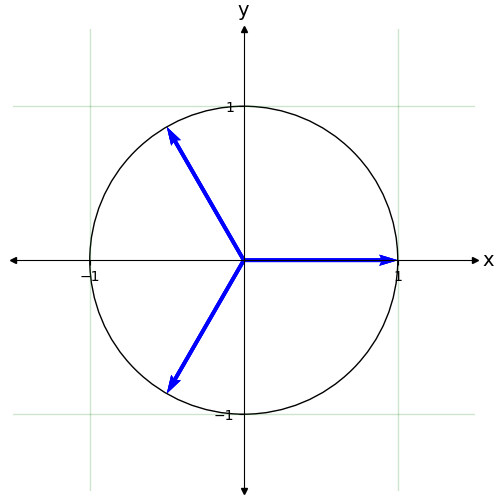

In [13]:
# cambiar el número N
N=9
rho=1
j=3
''' Creamos las fases'''
lista_de_fases=np.exp(2*j*np.pi*1j*np.array(range(N))/N)
#print('lista de fases =', np.round(lista_de_fases,2))


''' Dibujamos los números complejos '''
tQ.plot_2D_plane(fsize=(6,6))
for vec in rho*lista_de_fases:
    tQ.draw_vector(x=vec.real,y=vec.imag)

#draw_unit_circle()
plt.gca().add_patch(plt.Circle((0.,0.),1.,color='black',fill=False)) 

''' Calculamos la suma. '''
#print(lista_de_fases)
print(np.round(sum(rho*lista_de_fases),10))


(9-0j)


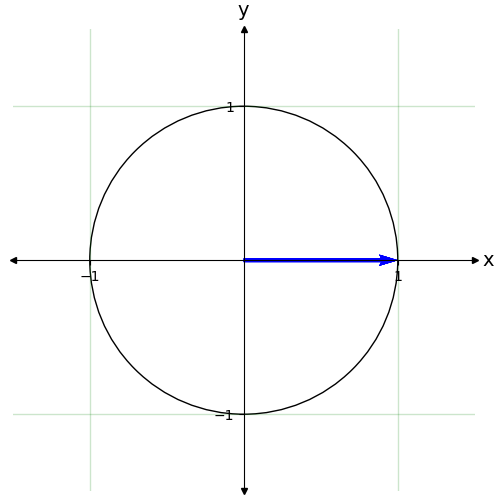

In [14]:
# cambiar el número N
N=9
rho=1
j=N
''' Creamos las fases'''
lista_de_fases=np.exp(2*j*np.pi*1j*np.array(range(N))/N)
#print('lista de fases =', np.round(lista_de_fases,2))


''' Dibujamos los números complejos '''
tQ.plot_2D_plane(fsize=(6,6))
for vec in rho*lista_de_fases:
    tQ.draw_vector(x=vec.real,y=vec.imag)

#draw_unit_circle()
plt.gca().add_patch(plt.Circle((0.,0.),1.,color='black',fill=False)) 

''' Calculamos la suma. '''
#print(lista_de_fases)
print(np.round(sum(rho*lista_de_fases),10))


|z1|+|z2|= 4.919349550499537
|z1+z2|= 4.8645696489522345


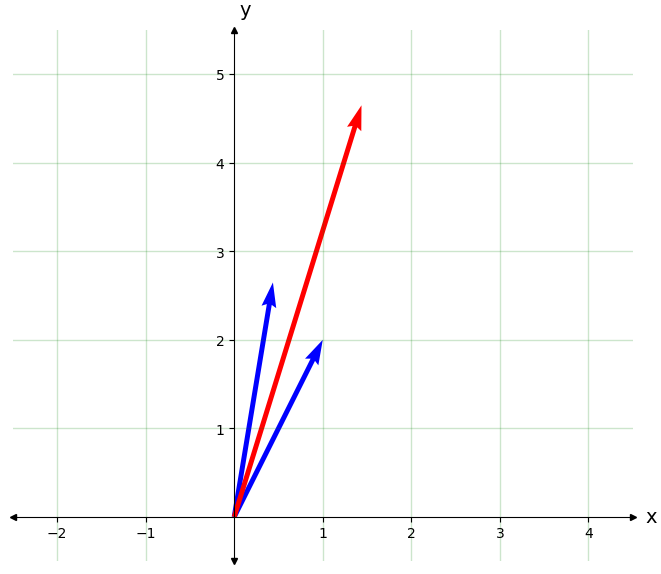

In [15]:
'''Comprueba que sólo cuando z1 y z2 son paralelos, se satura la desigualdad triangular'''

'''Suma en cartesianas'''
z1 = 1+2j

ang = 0.3 #el ángulo entre z1 y z2
z2 = z1*(1.2*np.exp(1j*ang))

'''Suma '''
zs = z1+z2

print('|z1|+|z2|=',abs(z1)+abs(z2))
print('|z1+z2|=',abs(z1+z2))


tQ.plot_2D_plane(left=-2,right=4,up=5,down=-0) #cambiar las dimensiones para que encuadrar la figura
tQ.draw_vector(z1.real,z1.imag,'b')
tQ.draw_vector(z2.real,z2.imag,'b')
tQ.draw_vector(zs.real,zs.imag,vcolor='r')